In [57]:
import pickle
import numpy as np

import sys
sys.path.append('../../')
import ndrought.drought_network as dnet

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

In [58]:
usdm_net = dnet.DroughtNetwork.unpickle('/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet/USDM_net.pickle')

In [59]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [60]:
len(usdm_net.origins)

381

In [61]:
with open(f'{dt_path}/USDM_tracks.pickle', 'rb') as f:
    unpickler = pickle.Unpickler(f)
    usdm_dt = unpickler.load()

In [62]:
len(usdm_dt)

7

In [63]:
len(usdm_dt[0])

319

okay, and distance here is in meters, so applying 1e-3 would get us kilometers

In [64]:
usdm_dtd = dict()
vars = ['x', 'y', 'u', 'v', 't', 'c', 'a']

for tracks, var in zip(usdm_dt, vars):
    var_tracks = []
    for track in tracks:
        var_tracks.append(np.array(track))
    usdm_dtd[var] = var_tracks

In [65]:
usdm_dtd

{'x': [array([ -861644.69393041,  -861644.69393041,  -861644.69393041,
          -906454.36202276,  -906454.36202276, -1281268.09261104,
         -1281253.60642867, -1246886.00086   , -1229829.7133557 ,
         -1057257.55930343, -1056118.67292178, -1058116.05069999,
         -1094304.89067016, -1094291.43938894, -1077380.8515931 ,
         -1077373.94435688, -1140094.96475362, -1152437.8104401 ,
         -1122132.14128296, -1122134.87772213, -1134185.00756273,
         -1159660.63419732, -1159580.84253959, -1159580.84253959,
         -1157433.92192059,  -938653.21220978, -1017614.3227187 ,
         -1045570.32276241, -1126307.7824834 , -1143823.848269  ,
         -1233660.95489459, -1291042.47101276, -1315835.79699746,
         -1302784.50051246, -1232816.10031384, -1233848.6238018 ]),
  array([-1151099.17020979, -1005667.32708953, -1007391.69951798,
         -1007391.69951798, -1010834.45628466, -1093735.63206178,
         -1093735.63206178, -1107828.26912374, -1100784.93700708,
   

In [66]:
distance = []

for u_track, v_track in zip(usdm_dtd['u'], usdm_dtd['v']):
    distance.append(np.sqrt(np.power(u_track, 2) + np.power(v_track,2)))

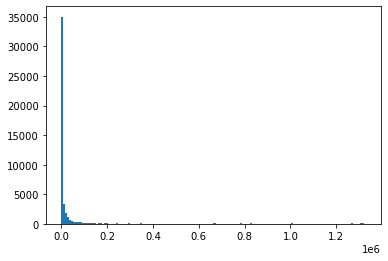

In [67]:
plt.hist(np.hstack(distance), bins=150);

In [68]:
track_lifetime = []

for times in usdm_dtd['t']:
    track_lifetime.append((np.max(times) - np.min(times))*7) # multiply by 7 to get to days

In [69]:
total_distance = []

for track in distance:
    total_distance.append(track.sum())

In [70]:
summary_df = pd.DataFrame(index=np.arange(len(track_lifetime)))
summary_df['lifetime'] = track_lifetime
summary_df['distance'] = total_distance
summary_df

,lifetime,distance
0,245,2.478085e+06
1,119,1.483973e+06
2,70,9.311512e+05
3,0,7.503391e+03
4,0,1.850907e+04
...,...,...
314,63,1.279491e+03
315,189,3.447472e+06
316,182,3.449677e+06
317,175,3.473050e+06


In [71]:
summary_df.groupby('lifetime').agg(['min', 'max', 'mean', 'std', 'count'])

distance                                                 
                   min           max          mean            std count
lifetime                                                               
0         0.000000e+00  1.850907e+04  2.278090e+03    5069.496744    15
7         0.000000e+00  1.252920e+05  1.392133e+04   41763.991685     9
14        0.000000e+00  1.723368e+05  7.901787e+03   33336.602459    29
21        0.000000e+00  6.789531e+05  4.468083e+04  169376.697875    16
28        0.000000e+00  2.385178e+04  1.349226e+03    4786.234262    29
...                ...           ...           ...            ...   ...
6146      7.620093e+07  7.620093e+07  7.620093e+07            NaN     1
6251      8.297904e+07  8.297904e+07  8.297904e+07            NaN     1
7280      8.795724e+07  8.795724e+07  8.795724e+07            NaN     1
7588      8.893879e+07  8.893879e+07  8.893879e+07            NaN     1
7854      9.250623e+07  9.250623e+07  9.250623e+07            NaN     1

[96 rows x 5 columns]

okay, for reference, WA is roughly 580 km wide, or 0.58 e6

oh wait, this is total distance ... but still, that one that's just a 0 lifetime doesn't make sense

In [72]:
summary_df['average velocity'] = summary_df['distance']/summary_df['lifetime']

In [73]:
summary_df

,lifetime,distance,average velocity
0,245,2.478085e+06,1.011463e+04
1,119,1.483973e+06,1.247036e+04
2,70,9.311512e+05,1.330216e+04
3,0,7.503391e+03,inf
4,0,1.850907e+04,inf
...,...,...,...
314,63,1.279491e+03,2.030938e+01
315,189,3.447472e+06,1.824059e+04
316,182,3.449677e+06,1.895427e+04
317,175,3.473050e+06,1.984600e+04


In [74]:
summary_df.groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730])).agg(['mean', 'max', 'min', 'std', 'count'])

lifetime                                  distance  \
                  mean  max  min         std count          mean   
lifetime                                                           
(0, 30]      19.481928   28    7    7.337444    83  1.335500e+04   
(30, 60]     40.975610   56   35    7.597657    41  1.807371e+04   
(60, 90]     68.833333   84   63    6.562058    12  1.060057e+05   
(90, 180]   128.905660  175   91   23.071181    53  2.658428e+05   
(180, 365]  253.891892  350  182   51.244395    37  7.861443e+05   
(365, 730]  498.615385  721  378  115.892736    26  3.559878e+06   

                                                  average velocity  \
                     max  min           std count             mean   
lifetime                                                             
(0, 30]     6.789531e+05  0.0  7.783548e+04    83       839.840896   
(30, 60]    2.963359e+05  0.0  6.187029e+04    41       378.015500   
(60, 90]    9.311512e+05  0.0  2.663069e+05    12      1513.939373   
(90, 180]   3.993551e+06  0.0  7.971796e+05    53      1941.437181   
(180, 365]  5.826920e+06  0.0  1.362333e+06    37      3028.232671   
(365, 730]  1.111437e+07  0.0  4.605615e+06    26      5634.830869   

                                                  
                     max  min          std count  
lifetime                                          
(0, 30]     32331.100165  0.0  4246.864690    83  
(30, 60]     6047.671373  0.0  1270.854708    41  
(60, 90]    13302.159572  0.0  3803.899735    12  
(90, 180]   33559.252579  0.0  5922.245328    53  
(180, 365]  18954.270431  0.0  5415.285349    37  
(365, 730]  15958.968823  0.0  7262.311095    26

So these are moving a lot still ... particularly looking at that average velocity

Okay, what about net distance?

In [75]:
def compute_distance(u,v):
    return np.sqrt(np.power(u, 2)+np.power(v, 2))

In [76]:
furthest_displacement = []
furthest_del_x = []
furthest_del_y = []

for x_track, y_track, u_track, v_track in zip(usdm_dtd['x'], usdm_dtd['y'], usdm_dtd['u'], usdm_dtd['v']):
    origin_x = x_track[0]
    origin_y = y_track[0]

    furthest_total_displacement = 0
    furthest_x_disp = 0
    furthest_y_disp = 0
    for x, y, u, v in zip(x_track, y_track, u_track, v_track):
        dist = compute_distance(u, v)
        if dist > furthest_total_displacement:
            furthest_total_displacement = dist
            furthest_x_disp = u+x-(origin_x)
            furthest_y_disp = v+y-(origin_y)
    furthest_displacement.append(furthest_total_displacement)
    furthest_del_x.append(furthest_x_disp)
    furthest_del_y.append(furthest_y_disp)

In [77]:
np.array(furthest_displacement)

array([5.20968338e+05, 3.24772527e+05, 3.24772527e+05, 7.50339096e+03,
       1.85090653e+04, 5.63826569e+05, 1.25291975e+05, 1.31120872e+06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.31120872e+06, 0.00000000e+00, 1.31120872e+06,
       5.73359653e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.42529987e+03, 0.00000000e+00,
       4.85787435e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [78]:
usdm = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/USDM_CONUS_105W_20000104_20220412.nc')

In [79]:
x_val = usdm['x'].values
y_val = usdm['y'].values

x_width = np.max(x_val) - np.min(x_val)
y_width = np.max(y_val) - np.min(y_val)

print(f'Maximum x distance = {x_width*10e-7} x 10e4 km')
print(f'Maximum y distance = {y_width*10e-7} x 10e4 km')


Maximum x distance = 2.295407216746075 x 10e4 km
Maximum y distance = 3.107509993206461 x 10e4 km


In [80]:
np.where(np.abs((furthest_del_x)/x_width>1))

(array([], dtype=int64),)

In [81]:
np.where(np.abs((furthest_del_y)/y_width)>1)

(array([], dtype=int64),)

Good, everything is in order.

In [82]:
displacement = []

for x_track, y_track, u_track, v_track in zip(usdm_dtd['x'], usdm_dtd['y'], usdm_dtd['u'], usdm_dtd['v']):
    del_x = u_track[-1]+x_track[-1]-(x_track[0])
    del_y = v_track[-1]+y_track[-1]-(y_track[0])

    displacement.append(compute_distance(del_x, del_y))

In [83]:
summary_df['displacement'] = displacement

In [84]:
summary_df

,lifetime,distance,average velocity,displacement
0,245,2.478085e+06,1.011463e+04,1.466802e+06
1,119,1.483973e+06,1.247036e+04,3.766370e+05
2,70,9.311512e+05,1.330216e+04,1.232154e+05
3,0,7.503391e+03,inf,7.503391e+03
4,0,1.850907e+04,inf,1.850907e+04
...,...,...,...,...
314,63,1.279491e+03,2.030938e+01,1.279491e+03
315,189,3.447472e+06,1.824059e+04,9.705835e+05
316,182,3.449677e+06,1.895427e+04,7.076828e+05
317,175,3.473050e+06,1.984600e+04,7.654046e+05


In [85]:
np.where(summary_df['distance'].values < summary_df['displacement'].values)[0]

array([], dtype=int64)

In [86]:
similarity = []

for a_track in usdm_dtd['a']:
    similarity.append(a_track.sum()/len(a_track))

In [87]:
summary_df['similarity'] = similarity

In [88]:
summary_df_grouped = summary_df.groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).agg(['mean', 'median', 'max', 'min', 'std', 'count'])
summary_df_grouped

lifetime                                         \
                     mean  median   max   min          std count   
lifetime                                                           
(0, 30]         19.481928    21.0    28     7     7.337444    83   
(30, 60]        40.975610    35.0    56    35     7.597657    41   
(60, 90]        68.833333    70.0    84    63     6.562058    12   
(90, 180]      128.905660   126.0   175    91    23.071181    53   
(180, 365]     253.891892   231.0   350   182    51.244395    37   
(365, 730]     498.615385   469.0   721   378   115.892736    26   
(730, 1825]   1121.666667   959.0  1736   735   360.659026    21   
(1825, 8141]  4013.032258  3752.0  7854  1834  1836.069615    31   

                  distance                                   ...  \
                      mean        median           max  min  ...   
lifetime                                                     ...   
(0, 30]       1.335500e+04  0.000000e+00  6.789531e+05  0.0  ...   
(30, 60]      1.807371e+04  0.000000e+00  2.963359e+05  0.0  ...   
(60, 90]      1.060057e+05  3.294222e+02  9.311512e+05  0.0  ...   
(90, 180]     2.658428e+05  0.000000e+00  3.993551e+06  0.0  ...   
(180, 365]    7.861443e+05  0.000000e+00  5.826920e+06  0.0  ...   
(365, 730]    3.559878e+06  0.000000e+00  1.111437e+07  0.0  ...   
(730, 1825]   1.367626e+07  1.259496e+07  2.265157e+07  0.0  ...   
(1825, 8141]  4.565084e+07  5.155895e+07  9.250623e+07  0.0  ...   

              displacement                           similarity            \
                       max  min            std count       mean    median   
lifetime                                                                    
(0, 30]       5.065288e+05  0.0   57532.986822    83   0.982121  1.000000   
(30, 60]      6.738867e+04  0.0   15452.594134    41   0.969734  1.000000   
(60, 90]      1.893848e+05  0.0   62985.287870    12   0.941536  0.996250   
(90, 180]     8.042730e+05  0.0  170804.293462    53   0.966224  1.000000   
(180, 365]    1.889816e+06  0.0  470750.548259    37   0.952474  1.000000   
(365, 730]    2.072949e+06  0.0  809859.256081    26   0.963881  1.000000   
(730, 1825]   2.347841e+06  0.0  841323.193800    21   0.909947  0.896701   
(1825, 8141]  2.424740e+06  0.0  914296.879552    31   0.934463  0.917257   

                                             
              max       min       std count  
lifetime                                     
(0, 30]       1.0  0.672158  0.062799    83  
(30, 60]      1.0  0.650860  0.079741    41  
(60, 90]      1.0  0.814377  0.079698    12  
(90, 180]     1.0  0.692411  0.076450    53  
(180, 365]    1.0  0.804665  0.063795    37  
(365, 730]    1.0  0.901043  0.044456    26  
(730, 1825]   1.0  0.871136  0.046155    21  
(1825, 8141]  1.0  0.903096  0.036165    31  

[8 rows x 30 columns]

In [89]:
summary_df_grouped['lifetime'].round(0)


,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",19.0,21.0,28,7,7.0,83
"(30, 60]",41.0,35.0,56,35,8.0,41
"(60, 90]",69.0,70.0,84,63,7.0,12
"(90, 180]",129.0,126.0,175,91,23.0,53
"(180, 365]",254.0,231.0,350,182,51.0,37
"(365, 730]",499.0,469.0,721,378,116.0,26
"(730, 1825]",1122.0,959.0,1736,735,361.0,21
"(1825, 8141]",4013.0,3752.0,7854,1834,1836.0,31


In [90]:
(summary_df_grouped['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",13.0,0.0,679.0,0.0,78.0,0.0
"(30, 60]",18.0,0.0,296.0,0.0,62.0,0.0
"(60, 90]",106.0,0.0,931.0,0.0,266.0,0.0
"(90, 180]",266.0,0.0,3994.0,0.0,797.0,0.0
"(180, 365]",786.0,0.0,5827.0,0.0,1362.0,0.0
"(365, 730]",3560.0,0.0,11114.0,0.0,4606.0,0.0
"(730, 1825]",13676.0,12595.0,22652.0,0.0,8222.0,0.0
"(1825, 8141]",45651.0,51559.0,92506.0,0.0,29901.0,0.0


In [91]:
(summary_df_grouped['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",10.0,0.0,507.0,0.0,58.0,0.0
"(30, 60]",5.0,0.0,67.0,0.0,15.0,0.0
"(60, 90]",37.0,0.0,189.0,0.0,63.0,0.0
"(90, 180]",55.0,0.0,804.0,0.0,171.0,0.0
"(180, 365]",240.0,0.0,1890.0,0.0,471.0,0.0
"(365, 730]",582.0,0.0,2073.0,0.0,810.0,0.0
"(730, 1825]",1189.0,1119.0,2348.0,0.0,841.0,0.0
"(1825, 8141]",1019.0,1008.0,2425.0,0.0,914.0,0.0


In [92]:
(summary_df_grouped['average velocity']).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",840.0,0.0,32331.0,0.0,4247.0,83
"(30, 60]",378.0,0.0,6048.0,0.0,1271.0,41
"(60, 90]",1514.0,5.0,13302.0,0.0,3804.0,12
"(90, 180]",1941.0,0.0,33559.0,0.0,5922.0,53
"(180, 365]",3028.0,0.0,18954.0,0.0,5415.0,37
"(365, 730]",5635.0,0.0,15959.0,0.0,7262.0,26
"(730, 1825]",11676.0,13639.0,16376.0,0.0,5891.0,21
"(1825, 8141]",10195.0,12474.0,15377.0,0.0,5675.0,31


In [93]:
(summary_df_grouped['similarity']).round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.982,1.000,1.0,0.672,0.063,83
"(30, 60]",0.970,1.000,1.0,0.651,0.080,41
"(60, 90]",0.942,0.996,1.0,0.814,0.080,12
"(90, 180]",0.966,1.000,1.0,0.692,0.076,53
"(180, 365]",0.952,1.000,1.0,0.805,0.064,37
"(365, 730]",0.964,1.000,1.0,0.901,0.044,26
"(730, 1825]",0.910,0.897,1.0,0.871,0.046,21
"(1825, 8141]",0.934,0.917,1.0,0.903,0.036,31


Let's get this into a single function for simplicity

In [94]:
def compute_track_lifetime(t_track, to_days):
    track_lifetime = []

    for times in t_track:
        track_lifetime.append((np.max(times) - np.min(times))*to_days)

    return track_lifetime

In [95]:
def compute_distance(u,v):
    return np.sqrt(np.power(u, 2)+np.power(v, 2))

In [96]:
def compute_track_distance(u_track, v_track):
    distance = []
    for u, v in zip(u_track, v_track):
        distance.append(compute_distance(u,v).sum())
    return distance

In [97]:
def compute_track_displacement(x_track, y_track, u_track, v_track):
    displacement = []

    for x, y, u, v in zip(x_track, y_track, u_track, v_track):
        del_x = u[-1]+x[-1]-(x[0])
        del_y = v[-1]+y[-1]-(y[0])

        displacement.append(compute_distance(del_x, del_y))
    
    return displacement

In [98]:
def compute_track_similarity(a_track):
    return [a.sum()/len(a) for a in a_track]

In [99]:
def compute_track_summary_characterization(dtrack_dict, to_days):
    x_track = dtrack_dict['x']
    y_track = dtrack_dict['y']
    u_track = dtrack_dict['u']
    v_track = dtrack_dict['v']
    t_track = dtrack_dict['t']
    a_track = dtrack_dict['a']

    lifetimes = compute_track_lifetime(t_track, to_days)
    distances = compute_track_distance(u_track, v_track)
    displacements = compute_track_displacement(x_track, y_track, u_track, v_track)
    similarity = compute_track_similarity(a_track)

    summary_df = pd.DataFrame(index=np.arange(len(lifetimes)))
    summary_df['lifetime'] = lifetimes
    summary_df['distance'] = distances
    summary_df['displacement'] = displacements
    summary_df['average velocity'] = summary_df['distance']/summary_df['lifetime']
    summary_df['similarity'] = similarity

    #return summary_df

    return summary_df.groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).agg(['mean', 'median', 'max', 'min', 'std', 'count'])

In [100]:
compute_track_summary_characterization(usdm_dtd, 7).columns

MultiIndex([(        'lifetime',   'mean'),
            (        'lifetime', 'median'),
            (        'lifetime',    'max'),
            (        'lifetime',    'min'),
            (        'lifetime',    'std'),
            (        'lifetime',  'count'),
            (        'distance',   'mean'),
            (        'distance', 'median'),
            (        'distance',    'max'),
            (        'distance',    'min'),
            (        'distance',    'std'),
            (        'distance',  'count'),
            (    'displacement',   'mean'),
            (    'displacement', 'median'),
            (    'displacement',    'max'),
            (    'displacement',    'min'),
            (    'displacement',    'std'),
            (    'displacement',  'count'),
            ('average velocity',   'mean'),
            ('average velocity', 'median'),
            ('average velocity',    'max'),
            ('average velocity',    'min'),
            ('average velocity',

/tmp/ipykernel_1330497/1585282540.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  summary_df.groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot(ax=axs)


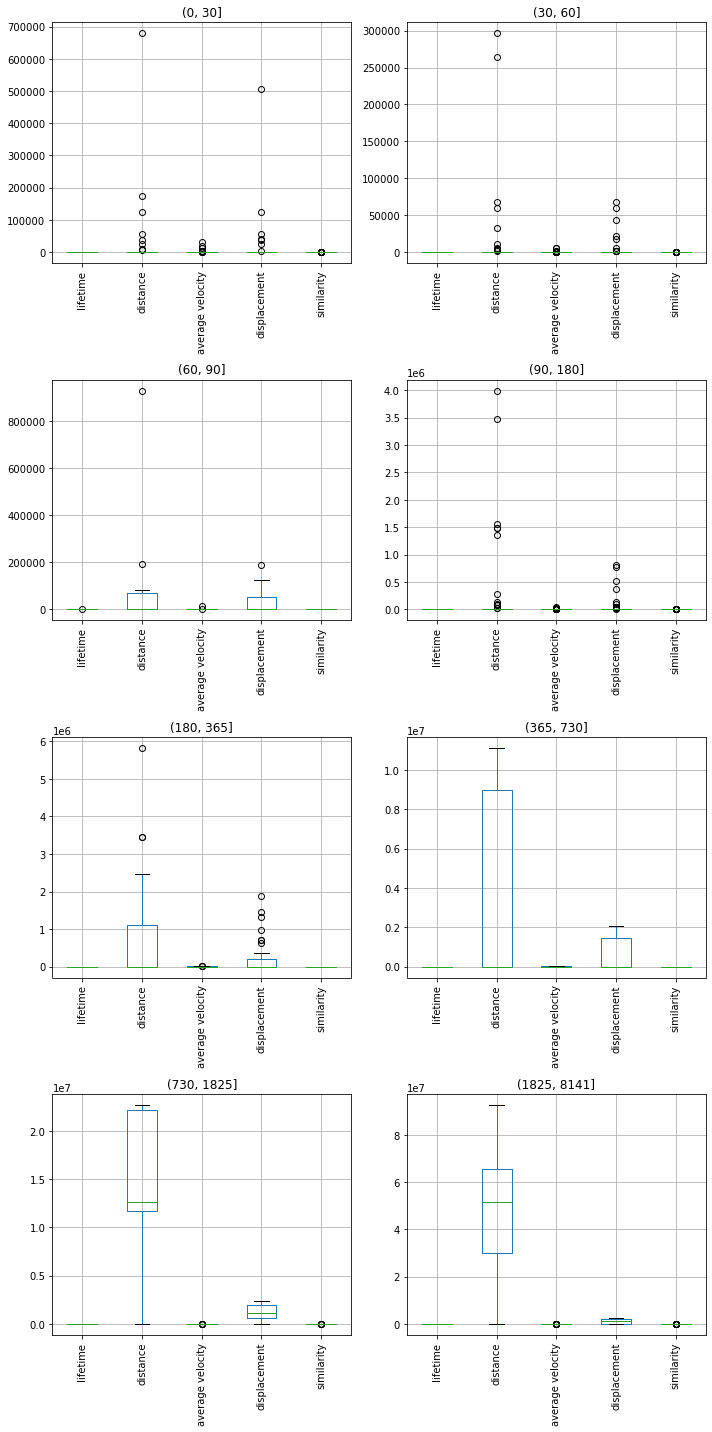

In [103]:
fig, axs = plt.subplots(4,2, figsize=(10,20))

summary_df.groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot(ax=axs)

for ax in axs.ravel():
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

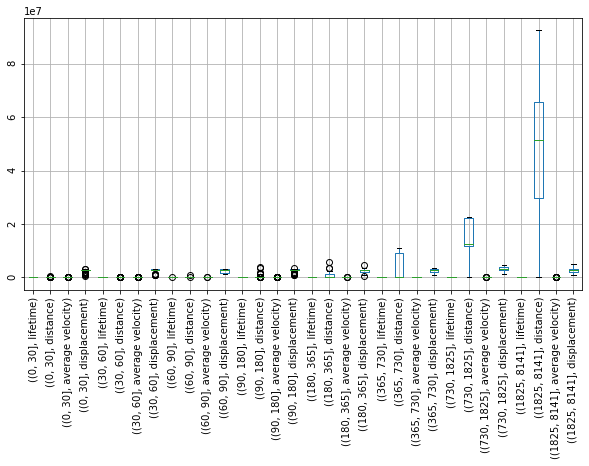

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

summary_df.groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax)

ax.tick_params(axis='both', rotation=90)

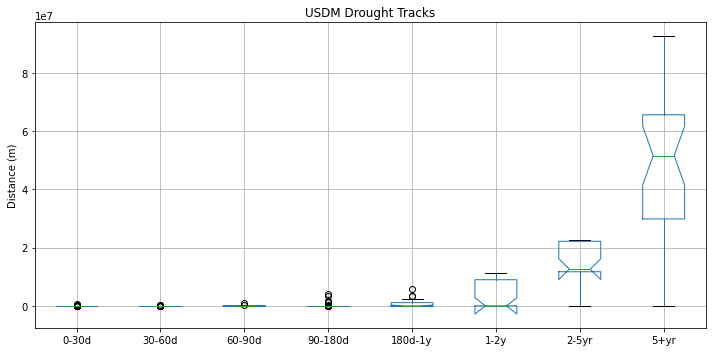

In [131]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(summary_df['distance']).groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (m)')
ax.set_title("USDM Drought Tracks")

plt.tight_layout()

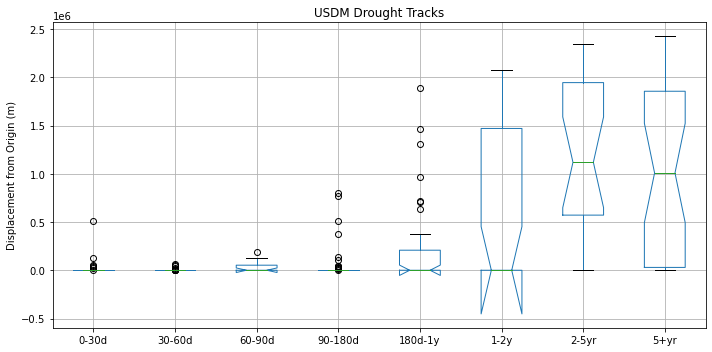

In [130]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(summary_df['displacement']).groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (m)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

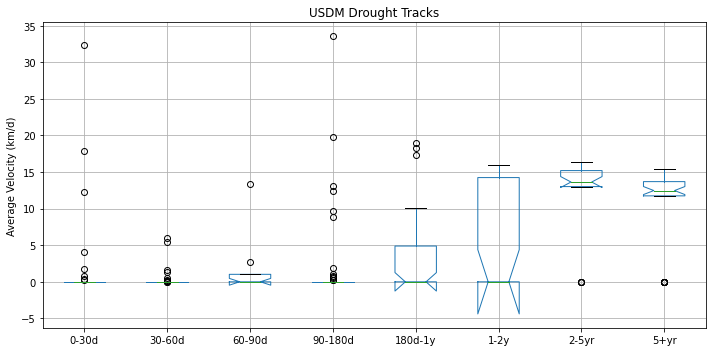

In [129]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(summary_df['average velocity']/1e3).groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

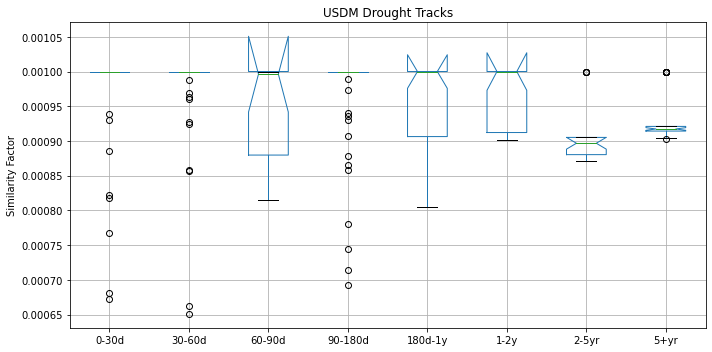

In [128]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(summary_df['similarity']/1e3).groupby(pd.cut(summary_df.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()